# Project: Investigate TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project of my Data Analysis, I am investigating a TMDb movies database file which has collection of important detials of about 10k+ movies, including their details of budget, revenue, release dates, etc.

> Let's start looking at the dataset to get an understanding of the data .... 



In [106]:
# Import the libraries needed for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
% matplotlib inline

> Let's load the data , try and understand the data, datatypes which helps to decide the data cleaning process

In [107]:
# Load the data using Panda and print the head inorder to start understanding the data.
tmdb_movie_df = pd.read_csv("tmdb-movies.csv")
tmdb_movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Here are observations and questions to continue....

### What can we say about the dataset provided?
The columns *'budget', 'revenue', 'budget_adj', 'revenue_adj'* has not given us the currency but for this dataset we will assume that it is in dollars.
The vote count for each movie is not similar, for example, the movie *'Mad Max : Fury Road'* has *6k+* votes while *Sinister 2* has only *331 votes* (as seen above). Since the votes of the movies vary so much the *vote_average* column also is effected by it. So we cannot calculate or assume that movie with highest votes or rating was more successful since the voters of each film vary.

### What needs to be Wrangled and Cleaned
we want to know how can this data be trimmed so we can only have the columns we need. This will also make our dataset clean and easy for us to calculate what we want.

As you can see in this database of movies there are lots of movies where the budget or revenue have a value of '0' which means that the values of those variables of those movies has not been recorded. Calculating the profits of these movies would lead to inappropriate results. So we need to delete these rows.
Also this dataset has some duplicate rows. We have to clean that too for appropriate results.
We will also calculate the average runtime of the movies so in case if we have a runtime of a movie '0' then we need to replace it with `NaN`.
The *'release_date'* column must be converted into date format.
Checking if all columns are in the desired data type, if not then we have to change it.
Mentioning the country currency in the desired columns.
Finally, we will also remove unnecessory columns such as *'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count' and 'vote_average'.*


### Questions to be Answered
<ol>
    <li>General questions about the dataset.</li>
        <ol type = 'a'>
            <li><a href="#1A">Which movie earns the most and least profit?</a></li>
            <li><a href="#1B">Which movie had the greatest and least runtime?</a></li>
            <li><a href="#1C">Which movie had the greatest and least budget?</a></li>
            <li><a href="#1D">Which movie had the greatest and least revenue?</a></li>
            <li><a href="#1E">What is the average runtime of all movies?</a></li>
            <li><a href="#1F">In which year we had the most movies making profits?</a></li>
        </ol>
    <li>What are the similar characteristics does the most profitable movie have?</li>
        <ol type = 'a'>
            <li><a href="#2A">Average duration of movies.</a></li>
            <li><a href="#2B">Average Budget.</a></li>
            <li><a href="#2C">Average revenue.</a></li>
            <li><a href="#2D">Average profits.</a></li>
            <li><a href="#2E">Which director directed most films?</a></li>
            <li><a href="#2F">Whcih cast has appeared the most?</a></li>
            <li><a href="#2G">Which genre were more successful?</a></li>
        </ol>
</ol>


<a id='cleaning'></a>
## Data Cleaning

**Before answering the above questions we need a clean dataset which has columns and rows we need for calculations.**

First, lets clean up the columns.
We will only keep the columns we need and remove the rest of them.

Columns to delete -  `id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count and vote_average.`

In [108]:
# Let's see the total number of rows (exclude the header from the row count) and colums
"The total numbers of rows are {} and total number of columns are {}".format(tmdb_movie_df.shape[0] - 1, tmdb_movie_df.shape[1])

'The total numbers of rows are 10865 and total number of columns are 21'

In [109]:
tmdb_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [110]:
# create a list of the columns to be deleted , as they will not be useful for data analysis
delete_columns = ["id", "imdb_id", "popularity", "homepage", "keywords", "overview", "production_companies", "vote_count",
                 "vote_average", "budget_adj", "revenue_adj"]

# delete the columns and update the dataset. Handle the exception if any column is already is deleted
try:
    tmdb_movie_df.drop(delete_columns, axis=1, inplace=True)
except:
    print("columns are already deleted")

# verify the columns have been deleted
tmdb_movie_df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


> This data now looks clean and in readable format, let's clean it up more so that it's to go for analysis

In [111]:
# let's clean the duplicate rows
tmdb_movie_df.drop_duplicates(keep="first", inplace=True)

# the total number of rows and columns after removing the duplicates
"After removing the duplicates, the total number of rows are {} and the total number of columns are {}".format(tmdb_movie_df.shape[0] - 1, 
                                                                                                              tmdb_movie_df.shape[1])

'After removing the duplicates, the total number of rows are 10864 and the total number of columns are 10'

> So, one duplicate row got deleted.
Now, lets figure out which movies have a value of '0' in their budget or revenue, and then deleting those movies from database.

In [112]:
# create list of budget and revenue column names
check_row = ["budget", "revenue"]

# replace 0 with NAN and then drop those rows with NAN values with exception handling if they are already dropped
try:
    tmdb_movie_df[check_row] = tmdb_movie_df[check_row].replace(0, np.NAN)
    tmdb_movie_df.dropna(subset=check_row, inplace=True)
except:
    print("rows with '0' in their budget or revenue, are already deleted")

# the total number of rows and columns after removing the duplicates
"After removing data with '0' in budget or revenue, the total number of rows are {} and the total number of columns are {}".format(tmdb_movie_df.shape[0] - 1, 
                                                                                                              tmdb_movie_df.shape[1])

"After removing data with '0' in budget or revenue, the total number of rows are 3853 and the total number of columns are 10"

> So, around 7k data has been removed as part of cleaning process and we are now left with 3853 rows and 10 columns of clean data. This completed the data cleaning process.

In [113]:
# let's replace runtime values which are zero with NAN. And add exception handling if the data is already replaced
try:
    tmdb_movie_df["runtime"].replace(0, np.NAN, inplace=True)
except:
    print("Data with runtime 0 are already deleted")
# verify the data is replace
tmdb_movie_df.query("runtime == 'NAN'").head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year


<a id='wrangling'></a>
## Data Wrangling

> Let's start looking at datatypes and also verify if we need to add/update any columns

In [114]:
# let's look at the datatypes of the columns
tmdb_movie_df.dtypes

budget            float64
revenue           float64
original_title     object
cast               object
director           object
tagline            object
runtime             int64
genres             object
release_date       object
release_year        int64
dtype: object

> release data needs to be changed to datatime format, budget and revenue needs to converted to integer and since we assumed budget and revenue are in USD , better to rename them to USD so that it's clear

In [115]:
# convert release_date to datetime format
tmdb_movie_df["release_date"] = pd.to_datetime(tmdb_movie_df["release_date"])
# check the datatype is changed
tmdb_movie_df.dtypes
tmdb_movie_df.head(1)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015


In [116]:
# let's change data type of budget and revenue to integer
tmdb_movie_df[['budget', 'revenue']] =  tmdb_movie_df[['budget', 'revenue']].apply(np.int64)

# now verify all the datatypes
tmdb_movie_df.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

> Now all the columns are in the desired format. Let's start changing the budget and revenue column names

In [117]:
# rename the budget and revenue columns
tmdb_movie_df.rename(columns={"budget": "budget_usd", "revenue": "revenue_usd"}, inplace=True)

# verify if they are checked
tmdb_movie_df.head(1)

,budget_usd,revenue_usd,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015


<a id='eda'></a>
## Exploratory Data Analysis

> Now that we've trimmed and cleaned your data, we're ready to move on to exploration. 
### Now that we have budget and revenue, it would be good to calculate profit and insert it in the dataframe so that we can also use this new variable for analysis

In [118]:
# calculate the profit by subtracting budget from revenue and insert it back to the dataset as a new column
# add exception handling scenarios so that we can handle if the column is already added
try:
    tmdb_movie_df.insert(2, 'profit_usd', tmdb_movie_df["revenue_usd"] - tmdb_movie_df["budget_usd"])
except:
    print("column is already added")

# set the datatype to newly added column profit_usd as integer just like revenue_usd and budget_usd column
tmdb_movie_df["profit_usd"] = tmdb_movie_df["profit_usd"].apply(np.int64)

> now we have all the columns and data we need to start visualization and answer questions on data. Let's do a quick final check of data and datatypes

In [119]:
# print the datatypes
tmdb_movie_df.dtypes

budget_usd                 int64
revenue_usd                int64
profit_usd                 int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [120]:
# quick peek of data
tmdb_movie_df.head(2)

,budget_usd,revenue_usd,profit_usd,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


### Let's start with visualization and analyzing the data answering all the questions in the introduction

<a id='1A'></a>
#### Which movie earns the most and least profit?

In [121]:
# common function which takes the dataframe, column name as arguments

def highest_lowest(df, column_name):
    """
    :param df: pandas dataframe object
    :param column_name: dataframe column name
    :return : pandas DataFrame object
    """
    # get the highest index and value and store in df format
    highest_id = df[column_name].idxmax()
    highest_details = pd.DataFrame(df.loc[highest_id])
    
    # get the lowest index and value and store in df format
    lowest_id = df[column_name].idxmin()
    lowest_details = pd.DataFrame(df.loc[lowest_id])
    
    # return the concatenated dataframe object
    return pd.concat([highest_details, lowest_details], axis=1)

In [122]:
# call the common function to find out movie earning highest and least profit
highest_lowest(tmdb_movie_df, "profit_usd")

,1386,2244
budget_usd,237000000,425000000
revenue_usd,2781505847,11087569
profit_usd,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


> The columns names for above results are the index numbers. The first column shows hightest in profit made and second column shows lowest in profit made.

> Avatar directed by Jame Cameron and released in the year 2009 is all time highest profit making movie with profit `$2.5B`, may be all time in history but that may or may not be true as we don't have data of movies till date

> The Warrior's Way directed by Sngmoo Lee and release in the year 2010 is all the time lowest profit making movie with loss of `$4.1M`

<a id='1B'></a>
#### Which movie had the greatest and least runtime?

In [123]:
# calling the common function to find out greatest and least run time of movies
highest_lowest(tmdb_movie_df, "runtime")

,2107,5162
budget_usd,18000000,10
revenue_usd,871279,5
profit_usd,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


> Again the first column indicates highest runtime movie and second column indicates lowest runtime movie

> Carlos movie directed by Olivier Assayas is highest runtime movie with 338 seconds, which is quite uncommon when compared to average runtime of movies of 100seconds

> Kid's Story directed by Shinichiro Watanabe is lowest runtime movie with 15seconds, which is again quite uncommon when compared to average runtime of movies of 100 seconds

<a id='1C'></a>
#### Which movie had the greatest and least budget?

In [124]:
# calling the common function to find out greatest and least budget of movies
highest_lowest(tmdb_movie_df, "budget_usd")

,2244,2618
budget_usd,425000000,1
revenue_usd,11087569,100
profit_usd,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


> The Warrior's Way is all time highest budget movie with `$425M` which also happened to be highest loss movie too... This is very interesting....

> Lost & Found Moview is all time least budget movie with only `$1` which sounds so fishy... as it's impossible to make a movie with just a dollor unless it's a local movie or it's non-profit or message oriented movie where everybody worked for free..


<a id='1D'></a>
#### Which movie had the greatest and least revenue?

In [125]:
# calling the common function to find out greatest and least revenue of movies
highest_lowest(tmdb_movie_df, "revenue_usd")

,1386,5067
budget_usd,237000000,6000000
revenue_usd,2781505847,2
profit_usd,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00


> Hmmm... interesting, Avatar movie is highest profit making and highest revenue making movie but not highest budget, which clearly shows how the Producers and Director James Cameron has planned perfectly.

> Shattered Glass ... wow is the lowest revenue making movie just with `$2` and budget of `$60M`.

> The data and observations are getting more and more interesting, let's dive more into data....

<a id='1E'></a>
#### What is the average runtime of all movies?

In [126]:
# Common function which can calculate average of given dataframe and it's column
def calculate_average_function(df, column_name):
    """
    :param df: pandas dataframe object
    :param column_name: dataframe column name
    :return : average of given dataframe column
    """
    return df[column_name].mean()

In [127]:
# calling the average function to find out average runtime of movies
calculate_average_function(tmdb_movie_df, "runtime")

109.22029060716139

**The average runtime of all movies in this dataset is `109 mins` approx.
We want to get a deeper look and understanding of runtime of all movies so Let's plot it. **

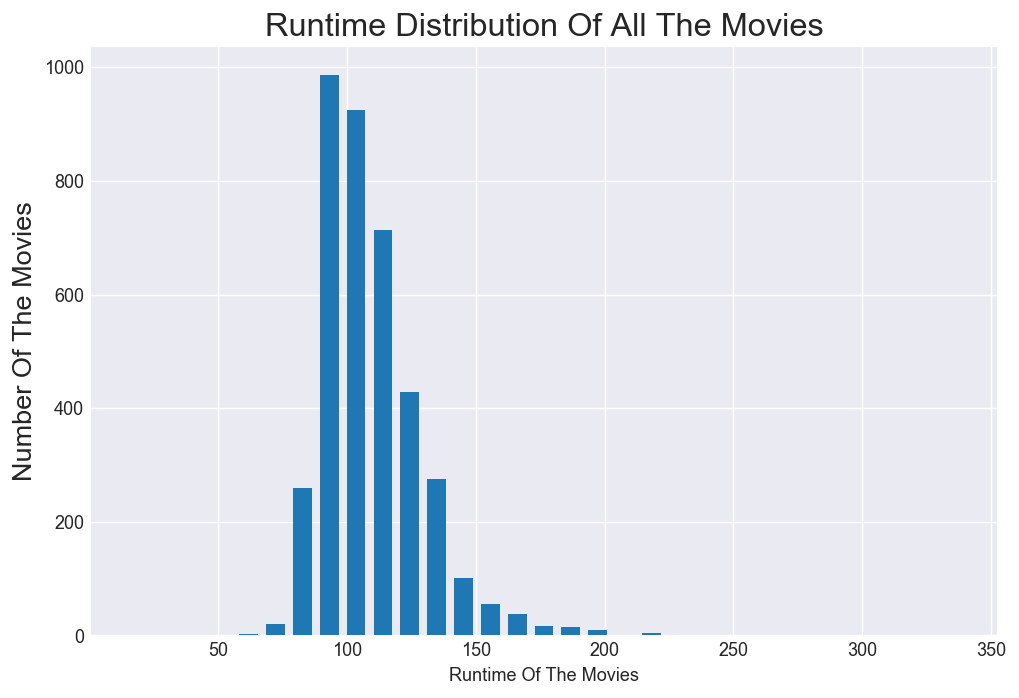

In [128]:
# plotting the histogram of runtime of the movies

# setting the label size for the plot
plt.rc('xtick', labelsize=10);
plt.rc('ytick', labelsize=10);

# setting the width and height figure size
plt.figure(figsize=(9, 6), dpi=130);

# x axis label name
plt.xlabel("Runtime Of The Movies", fontsize=10);
plt.ylabel("Number Of The Movies", fontsize=15);

# set the title for the plot
plt.title("Runtime Distribution Of All The Movies", fontsize=18);

# plot the histogram
plt.hist(tmdb_movie_df["runtime"], rwidth=0.7, bins=31, label="Runtime");

The above graph shows us that how many movies lie between the time interval x1 to x2. For example, as you can see the tallest bar here is time interval between `85-100 min`(approx) and around 1000 movies out of 3855 movies have the runtime between these time intervals. So we can also say from this graph that mode time of movies is around `85-110 min`, has the highest concentration of data points around this time interval. The distribution of this graph is positively skewed or right skewed!

**Let's dig deep and figure out the outliers of this distribution.**

<a id='1F'></a>
#### In which year we had the most movies making profits?

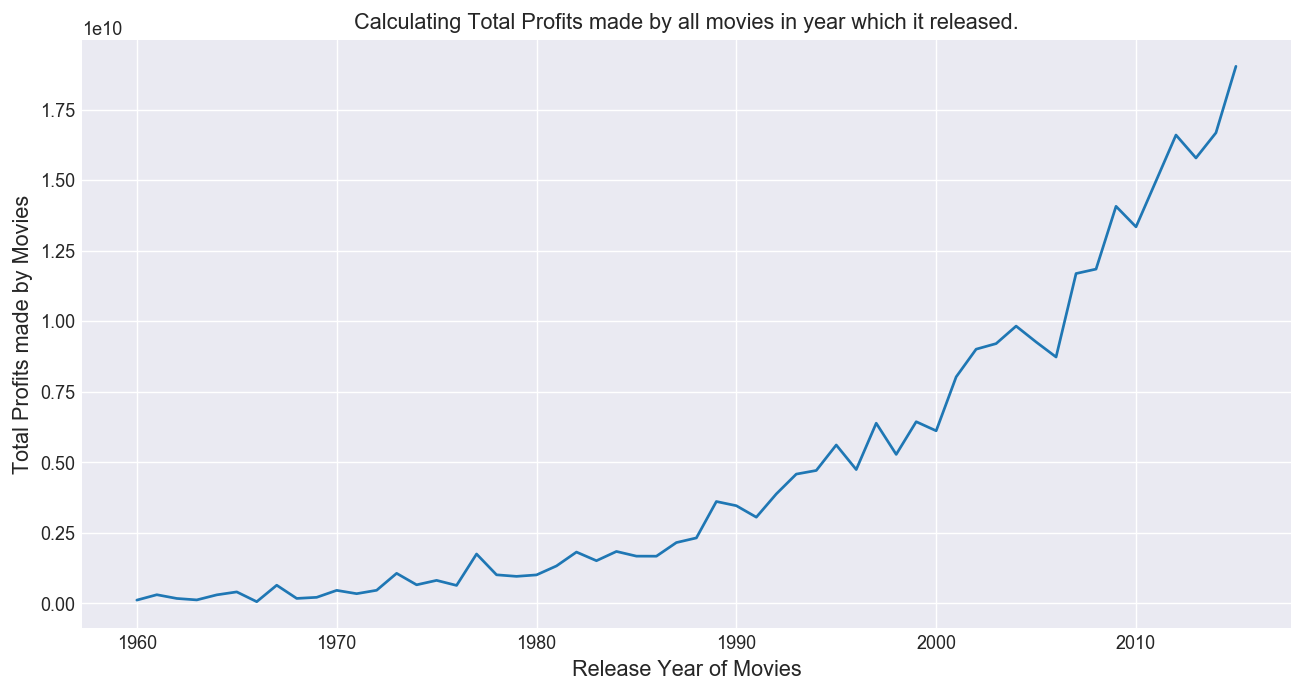

In [132]:
#the groupby function below collects all the movies for that year and then the profits of all those movies for that years is been added
#and storing all this in variable
profits_each_year = tmdb_movie_df.groupby('release_year')['profit_usd'].sum()

#giving the figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130);

#labeling x-axis
plt.xlabel('Release Year of Movies', fontsize = 12);
#labeling y-axis
plt.ylabel('Total Profits made by Movies', fontsize = 12);
#title of a the plot
plt.title('Calculating Total Profits made by all movies in year which it released.');

#plotting what needs to be plotted
plt.plot(profits_each_year);

Before i explain lets understand what the y axis shows us. Each values in the y-axis is been multiplied to '1e10' (as shown above the plot). Since the profits of movies are high, having 9+ digits, cannot fit the axis. So for example at the year 2010, the y-aixs value is around 1.35, which means that the profit at that year made by al movies released in that year is 1.35x1e10 =  13500000000 which is 13.5 billion dollars.

The year 2015, shows us the highest peak, having the highest profit than in any year, of more than 18 billion dollars. This graph doesn't exactly prove us that every year pass by, the profits of movies will increase but when we see in terms of decades it does show significant uprise in profits. At the year 2000, profits were around 8 biilion dollars, but in just 15 years it increased by 10+ biilion dollars. Last 15 years had a significant rise in profits compared to any other decades as we can see in the graph.

Not every year had same amount of movies released, the year 2015 had the most movie releases than in any other year. The more old the movies, the more less releases at that year (atleast this is what the dataset shows us).

This dataset also doesn't show all the movies that has been released in each year. If it would the graph might would show some different trend.

Also to note, In the dataset, there were also movies that had negative profits which drags down the the profits of other movies in those years. So we are not just calculating the movies which made profits, but also which went in loss! The highest profit making movie Avatar in 2009 alone drags the profit up by 2.5 billion dollars out of 14 billion dollars(calculations below).

For convenience, i have shown which year had the most profit. Also we will take a look at the profits of each year with exact figures.

In [133]:
# year in which there were highest profits
profits_each_year.idxmax()

2015

In [134]:
# convert profits_each_year to dataframe for clean and better visualization 
profits_each_year = pd.DataFrame(profits_each_year)
profits_each_year.tail()

,profit_usd
release_year,
2011,14966694704
2012,16596845507
2013,15782743325
2014,16676201357
2015,19032145273


> So, 2015 is highest profit making year wtih `19 Billion Dollars` profit

<a id='2A'></a>
#### Average duration of movies?

In [136]:
# calculates average of given column in given dataframe
def calculate_average_function(df, column_name):
    """
    :param df: dataframe object
    :param column_name: dataframe column
    :return : average of given column name in dataframe
    """
    return df[column_name].mean()

In [137]:
calculate_average_function(tmdb_movie_df, "runtime")

109.22029060716139

> So, the average runtime of movies in around 109.2 seconds which quite make sense.

<a id='2B'></a>
#### Average Budget.?

In [138]:
calculate_average_function(tmdb_movie_df, "budget_usd")

37203696.954852104

> So, the average budget of movies is around `$37M`.

<a id='2C'></a>
#### Average Revenue.?

In [140]:
calculate_average_function(tmdb_movie_df, "revenue_usd")

107686616.09807992

> So, the average revenue of movies is around `$10Billion`.

<a id='2D'></a>
#### Average Profits.?

In [144]:
calculate_average_function(tmdb_movie_df, "profit_usd")

70482919.14322782

> So, the average profit of movies is around `$70M`

<a id='2E'></a>
#### Which director directed most films?

In [152]:
# function which extract the data in given column of given data frame and calculates the count
def extract_data(df, column_name):
    """
    :param df: DataFrame Object
    :param column_name: Column Name
    :return : int
    """
    all_data = df[column_name].str.cat(sep='|')
    all_data = pd.Series(all_data.split('|'))
    return all_data.value_counts(ascending=False)

In [153]:
# now findng out director who directed most films
director_data = extract_data(tmdb_movie_df, 'director')
director_data.head()

Steven Spielberg    28
Clint Eastwood      24
Ridley Scott        21
Woody Allen         18
Tim Burton          17
dtype: int64

> So, as everybody knows `Steven Spielberg` is The Director who is on top of the chart with `28` movies in his record. `Clint Eastwood` and `Ridley Scott` are the next in top 3 list with `24` and `21` movies in their record.

<a id='2F'></a>
#### Which cast has appeared the most?

In [157]:
# now findng out case who appeared most films
cast_data = extract_data(tmdb_movie_df, 'cast')
cast_data.head()

Robert De Niro       52
Bruce Willis         46
Samuel L. Jackson    44
Nicolas Cage         43
Matt Damon           36
dtype: int64

> `Robert De Niro` is on the top list with 52 movies in his record, hand down!!!, followed by `Bruce Willis` with `46` movies
and `Samuel L. Jackson` with `44` movies.

<a id='2E'></a>
#### Which genre were more successful?

In [168]:
# now findng out genre which is most successful
genre_data = extract_data(tmdb_movie_df, 'genres')
genre_data.head()

Drama        1756
Comedy       1358
Thriller     1204
Action       1085
Adventure     749
dtype: int64

> So, Drama genre is most successful followed by Comedy and Thriller. Interesting, let's plot this data to analyse in more detail

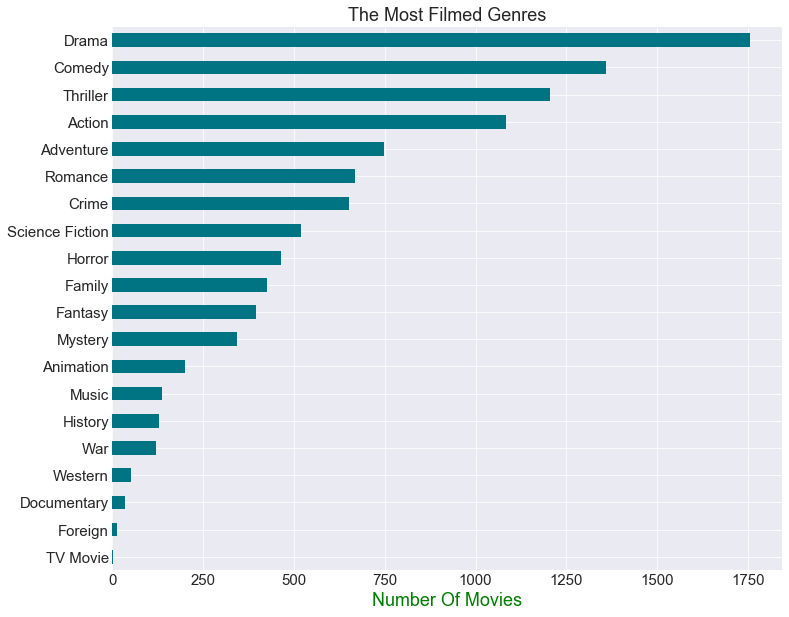

In [164]:
genre_data.sort_values(ascending=True, inplace=True)

# initilizing the plot
ax = genre_data.plot.barh(color='#007482', fontsize=15);

ax.set(title="The Most Filmed Genres");
ax.title.set_size(18);
ax.set_xlabel("Number Of Movies", color='g', fontsize=18)

ax.figure.set_size_inches(12, 10);


<a id='conclusions'></a>
## Conclusions

As i have answered the questions that i thought would be interesting to dig into, i want to wrap up all my findings in this way ....

Q. If i wanted to show one of the best and most profitable movie, who would i hire as director and cast, which genre would i choose and also at what month would i release the movie in?

Ans. I would..

Choose any director from this - Steven Spielberg, Clint Eastwood, Ridley Scott, Woody Allen, Tim Burton.

Choose any cast from this - Actors - Robert De Niro, Bruce Willis, Samuel L. Jackson, Nicolas Cage, Matt Damon.

Actress - Julia Roberts, Anne Hathaway, Angelina Jolie, Scarlett Johansson.

Choose these genre - Drama, Comedy, Thriller, Action, Adventure.

Choose these release months - May, June, July, November, December.

By doing all this, my probability of making a profitable movie would be higher and obviously i will take care of other influential factors too. ;) And also the runtime of the movie will be around 110 Minutes

Limitations - I want to make it clear, it's not 100 percent guaranteed solution that this formula is gonna work. I just took the entire dataset to find out similar characteristics of most profitable movie, as I thought we will be out some important data if I  take subset of movies which are in certain profit range. 

And that's my conclusion!